# Estadística Aplicada
## Cinthya Yesenia López Díaz 1658003
### Sesion 7 a 10 feb 2023

**Repaso de Regresión Lineal**

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline
#pip instal statsmodels si no esta instalada

In [3]:
datos = pd.read_excel('modelolineal (2).xlsx')

In [4]:
datos.shape

(30, 3)

In [5]:
datos.head()

,observación,Y,X
0,1,19.246957,23
1,2,16.878501,19
2,3,20.187237,27
3,4,12.176789,13
4,5,21.420112,21


In [7]:
datos = datos.set_index('observación')

In [8]:
datos.head()

,Y,X
observación,,
1,19.246957,23
2,16.878501,19
3,20.187237,27
4,12.176789,13
5,21.420112,21


In [9]:
datos.describe()

,Y,X
count,30.000000,30.000000
mean,19.038965,17.333333
std,5.689742,8.372094
min,6.808838,0.000000
25%,14.128834,12.250000
50%,19.937977,19.000000
75%,24.151130,23.000000
max,28.422786,29.000000


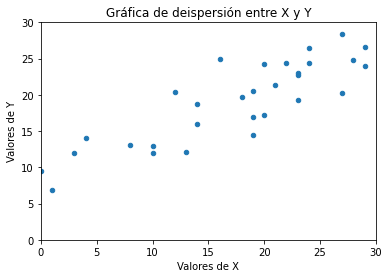

In [14]:
datos.plot.scatter('X', 'Y');
plt.title('Gráfica de deispersión entre X y Y')
plt.xlabel('Valores de X')
plt.ylabel('Valores de Y')
plt.xlim(0, 30) #limitar el eje X
plt.ylim(0, 30)

plt.show()

El grafico de dispersión muestra u7na relación lineal y positiva entre la variable X y la variable Y, tiene sentido estimar la regresión lineal.

Vamos a estimar el modelo $Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i$

In [15]:
reg = smf.ols(formula='Y~X', data = datos) #regresion por minimos cuadrados ordinarios
results = reg.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     76.40
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           1.72e-09
Time:                        15:46:35   Log-Likelihood:                -74.480
No. Observations:                  30   AIC:                             153.0
Df Residuals:                      28   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9619      1.276      7.022      0.0

El p-value (P > | t |) del intercepto $\beta_0$ es de 0.00, se rechaza H0 ($H_0i\beta_0=0$); por tanto el intercepto es distinto de cero. (El intercepto es significatico). 

A un nivel de confianza del 95% el intercepto ($\beta_0$) se encuentra entre (6.34 y 11.57). 

En promedio, cuando X aumenta en una unidad Y incrementa en 0.58.

In [17]:
datos['X_sq'] = datos['X']**2 

In [18]:
datos.head()

,Y,X,X_sq
observación,,,
1,19.246957,23,529
2,16.878501,19,361
3,20.187237,27,729
4,12.176789,13,169
5,21.420112,21,441


In [19]:
reg2 = smf.ols(formula='Y~X+X_sq', data=datos)
results2 = reg2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     36.85
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           1.92e-08
Time:                        16:09:43   Log-Likelihood:                -74.475
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      27   BIC:                             159.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8518      1.790      4.945      0.0

El p-value (P > | t |) del intercepto $\beta_0$ es distinto de cero, No se rechaza H0 ($H_0i\beta_0=0$). (El intercepto no es significatico).

A un nivel de confianza del 95% el intercepto ($\beta_0$) se encuentra entre (5.17 y 12.52). 

El p-value del X_sq $\beta_2$ es de 0.929, no es menor que alfa; por lo tanto no tiene relación con el intercepto (Y).